### Forecasting Ethereum prices with Facebook Prophet Model

In [1]:
# Install the required libraries
from IPython.display import clear_output
try:
  !pip install pystan~=2.14
  !pip install fbprophet
  !pip install hvplot
  !pip install holoviews
except:
  print("Error installing libraries")
finally:
  clear_output()
  print('Libraries successfully installed')

Libraries successfully installed


In [2]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import datetime as dt
import holoviews as hv
from fbprophet import Prophet

%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [3]:
# Upload the top 25 sp500 stocks csv file 
from google.colab import files
uploaded = files.upload()

Saving ETH-USD.csv to ETH-USD.csv


In [4]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("ETH-USD.csv",
                 index_col="Date",
                 infer_datetime_format=True,
                 parse_dates=True
                )

# Drop columns that won't be used
df = df.drop(columns=["Open", "High", "Low", "Close", "Volume"] , axis=1)

# Preview the dataset
df.head()

,Adj Close
Date,
2017-12-19,826.822998
2017-12-20,819.085999
2017-12-21,821.062988
2017-12-22,674.859985
2017-12-23,719.387024


In [5]:
# Reset the index so that we recode the columns for Prophet
df.reset_index(inplace = True)

In [12]:
# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df = df.rename(columns = {'Date' : 'ds', 'Adj Close' : 'y'})

In [13]:
prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1828 non-null   datetime64[ns]
 1   y       1828 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.7 KB


In [14]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2017-12-19,826.822998
1,2017-12-20,819.085999
2,2017-12-21,821.062988
3,2017-12-22,674.859985
4,2017-12-23,719.387024


,ds,y
1823,2022-12-16,1168.259399
1824,2022-12-17,1188.149536
1825,2022-12-18,1184.715210
1826,2022-12-19,1167.609863
1827,2022-12-20,1184.896118


In [15]:
# Sort the DataFrame by `ds` in ascending order
prophet_df = prophet_df.sort_values('ds', ascending = True)

# Display sample data from head and tail
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2017-12-19,826.822998
1,2017-12-20,819.085999
2,2017-12-21,821.062988
3,2017-12-22,674.859985
4,2017-12-23,719.387024


,ds,y
1823,2022-12-16,1168.259399
1824,2022-12-17,1188.149536
1825,2022-12-18,1184.715210
1826,2022-12-19,1167.609863
1827,2022-12-20,1184.896118


In [16]:
# Call the Prophet function, store as an object
model_eth = Prophet()

In [17]:
# Fit the Prophet model.
model_eth.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_trends = model_eth.make_future_dataframe(periods = 30, freq = 'D')

# View the last five rows of the predictions
display(future_trends.head())
display(future_trends.tail())

,ds
0,2017-12-19
1,2017-12-20
2,2017-12-21
3,2017-12-22
4,2017-12-23


,ds
1853,2023-01-15
1854,2023-01-16
1855,2023-01-17
1856,2023-01-18
1857,2023-01-19


In [19]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model_eth.predict(future_trends)

# Display the first five rows of the forecast DataFrame
display(forecast_trends.head())
display(forecast_trends.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-12-19,972.203360,684.222453,1367.413956,972.203360,972.203360,57.803711,57.803711,57.803711,0.938077,0.938077,0.938077,56.865635,56.865635,56.865635,0.0,0.0,0.0,1030.007071
1,2017-12-20,969.720231,658.480042,1330.830227,969.720231,969.720231,52.083414,52.083414,52.083414,3.615222,3.615222,3.615222,48.468192,48.468192,48.468192,0.0,0.0,0.0,1021.803645
2,2017-12-21,967.237102,653.280593,1354.406859,967.237102,967.237102,39.560592,39.560592,39.560592,-1.414383,-1.414383,-1.414383,40.974975,40.974975,40.974975,0.0,0.0,0.0,1006.797694
3,2017-12-22,964.753973,672.251711,1344.004323,964.753973,964.753973,28.888889,28.888889,28.888889,-5.582797,-5.582797,-5.582797,34.471686,34.471686,34.471686,0.0,0.0,0.0,993.642862
4,2017-12-23,962.270845,651.818335,1350.230863,962.270845,962.270845,28.518398,28.518398,28.518398,-0.498992,-0.498992,-0.498992,29.017390,29.017390,29.017390,0.0,0.0,0.0,990.789242


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1853,2023-01-15,518.704238,186.986788,876.008629,513.158592,524.279892,13.446484,13.446484,13.446484,1.614613,1.614613,1.614613,11.831871,11.831871,11.831871,0.0,0.0,0.0,532.150722
1854,2023-01-16,511.037346,170.515025,855.274408,504.901735,517.271338,6.894849,6.894849,6.894849,1.328260,1.328260,1.328260,5.566590,5.566590,5.566590,0.0,0.0,0.0,517.932196
1855,2023-01-17,503.370454,172.039577,850.201625,496.309707,510.027988,-0.266949,-0.266949,-0.266949,0.938077,0.938077,0.938077,-1.205025,-1.205025,-1.205025,0.0,0.0,0.0,503.103506
1856,2023-01-18,495.703562,135.049900,835.144432,487.934662,503.576567,-4.712104,-4.712104,-4.712104,3.615222,3.615222,3.615222,-8.327326,-8.327326,-8.327326,0.0,0.0,0.0,490.991459
1857,2023-01-19,488.036670,129.346037,825.919576,479.255267,497.288612,-17.041870,-17.041870,-17.041870,-1.414383,-1.414383,-1.414383,-15.627487,-15.627487,-15.627487,0.0,0.0,0.0,470.994800


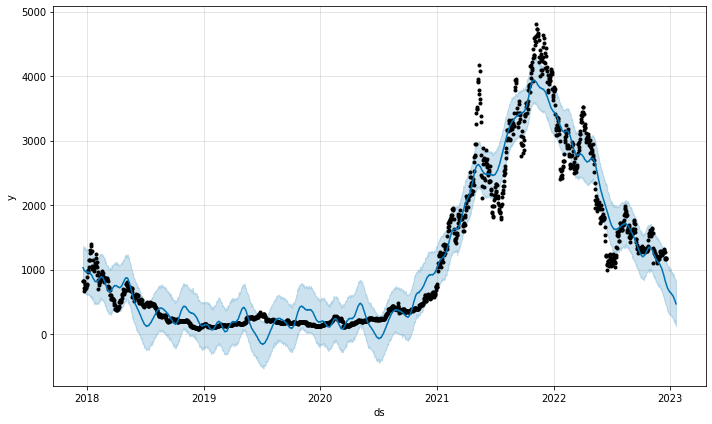

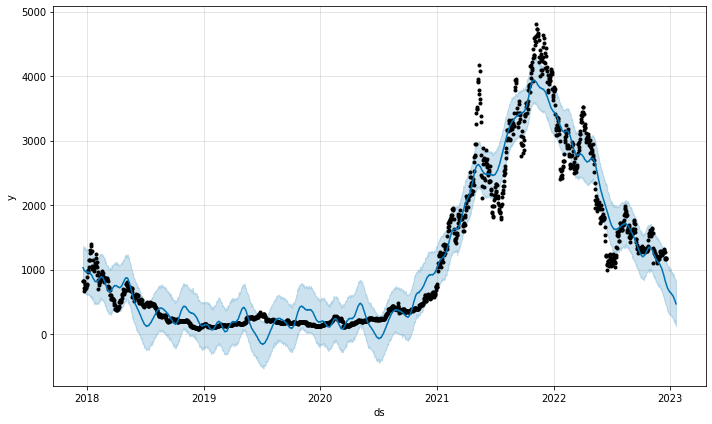

In [20]:
# Plot the Prophet predictions for the Mercado trends data
model_eth.plot(forecast_trends)

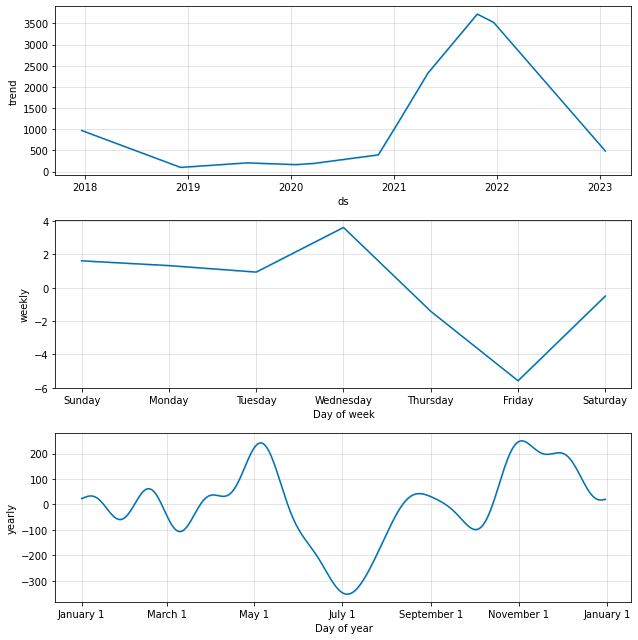

In [21]:
# Use the plot_components function to visualize the forecast results 
figures = model_eth.plot_components(forecast_trends)

In [22]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends.set_index('ds', inplace = True)
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2017-12-19,972.203360,684.222453,1367.413956,972.203360,972.203360,57.803711,57.803711,57.803711,0.938077,0.938077,0.938077,56.865635,56.865635,56.865635,0.0,0.0,0.0,1030.007071
2017-12-20,969.720231,658.480042,1330.830227,969.720231,969.720231,52.083414,52.083414,52.083414,3.615222,3.615222,3.615222,48.468192,48.468192,48.468192,0.0,0.0,0.0,1021.803645
2017-12-21,967.237102,653.280593,1354.406859,967.237102,967.237102,39.560592,39.560592,39.560592,-1.414383,-1.414383,-1.414383,40.974975,40.974975,40.974975,0.0,0.0,0.0,1006.797694
2017-12-22,964.753973,672.251711,1344.004323,964.753973,964.753973,28.888889,28.888889,28.888889,-5.582797,-5.582797,-5.582797,34.471686,34.471686,34.471686,0.0,0.0,0.0,993.642862
2017-12-23,962.270845,651.818335,1350.230863,962.270845,962.270845,28.518398,28.518398,28.518398,-0.498992,-0.498992,-0.498992,29.017390,29.017390,29.017390,0.0,0.0,0.0,990.789242


In [23]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
# Set `bokeh` to render hvPlot charts
hv.extension("bokeh")

forecast_trends_updated = forecast_trends[['yhat', 'yhat_lower', 'yhat_upper']]
forecast_trends_updated.iloc[-240:,:].hvplot()

Output hidden; open in https://colab.research.google.com to view.

In [24]:
# Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_trends = forecast_trends.reset_index()
forecast = forecast_trends[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Replace the column names to something less technical sounding
forecast = forecast.rename(columns = 
                                             {'yhat' : 'Most Likely Case',
                                              'yhat_lower' : 'Worst Case',
                                              'yhat_upper' : 'Best Case'}
                                             )

forecast = forecast.loc['2022-12-19':]
forecast.to_csv('ETH-USD_forecast.csv', index = False)
# Review the last five rows of the DataFrame
display(forecast.head())
display(forecast.tail())

,ds,Most Likely Case,Worst Case,Best Case
203,2018-07-10,129.583296,-227.301965,467.790846
204,2018-07-11,135.046404,-215.806076,483.071547
205,2018-07-12,133.588458,-240.810357,477.506981
206,2018-07-13,133.722740,-243.393173,468.460691
207,2018-07-14,143.784164,-231.739702,513.459411


,ds,Most Likely Case,Worst Case,Best Case
1853,2023-01-15,532.150722,186.986788,876.008629
1854,2023-01-16,517.932196,170.515025,855.274408
1855,2023-01-17,503.103506,172.039577,850.201625
1856,2023-01-18,490.991459,135.049900,835.144432
1857,2023-01-19,470.994800,129.346037,825.919576


In [25]:
# Display the average forecasted price for November 2022
forecast.mean()

<ipython-input-25-8e034c5a9dab>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  forecast.mean()


Most Likely Case    1189.178551
Worst Case           840.581930
Best Case           1537.573129
dtype: float64